In [3]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load dataset and model
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Evaluation Metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [7]:
# Set visualization style
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

In [9]:
# Load the MNIST dataset
# This might take a minute as it downloads the data the first time
mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')

# The data is in mnist['data'], and the labels are in mnist['target']
X = mnist.data
y = mnist.target

print("Dataset successfully loaded.")
print("Shape of feature matrix (X):", X.shape)
print("Shape of target vector (y):", y.shape)

Dataset successfully loaded.
Shape of feature matrix (X): (70000, 784)
Shape of target vector (y): (70000,)


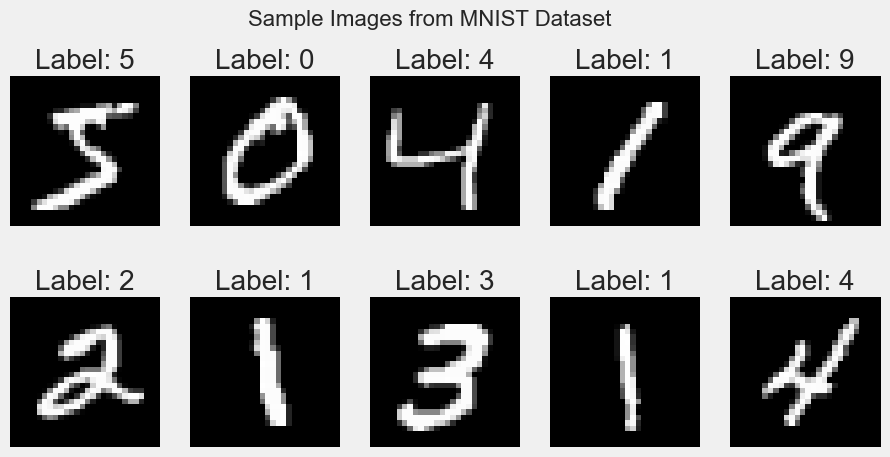

In [11]:
# Display a few sample images
plt.figure(figsize=(10, 5))
for index, (image, label) in enumerate(zip(X[:10], y[:10])):
    plt.subplot(2, 5, index + 1)
    # Reshape the 784-pixel vector back to a 28x28 image
    plt.imshow(image.reshape(28, 28), cmap=plt.cm.gray)
    plt.title(f'Label: {label}')
    plt.axis('off')
plt.suptitle("Sample Images from MNIST Dataset", fontsize=16)
plt.show()

In [13]:
# Check the distribution of the target variable
target_counts = pd.Series(y).value_counts().sort_index()
print("\nDistribution of Digits:")
print(target_counts)


Distribution of Digits:
0    6903
1    7877
2    6990
3    7141
4    6824
5    6313
6    6876
7    7293
8    6825
9    6958
Name: count, dtype: int64


In [15]:
# 1. Standard Train-Test Split for MNIST
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 60000
Test set size: 10000


In [17]:
# 2. Scale the pixel values to be between 0 and 1
X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0

In [19]:
# Create and train the Random Forest Classifier
# n_estimators is the number of trees in the forest. 100 is a good starting point.
# n_jobs=-1 uses all available CPU cores to speed up training.
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

print("Training the Random Forest model... (This may take a few minutes)")
model.fit(X_train_scaled, y_train)

print("Model training complete!")

Training the Random Forest model... (This may take a few minutes)
Model training complete!


In [21]:
# Make predictions on the scaled test data
y_pred = model.predict(X_test_scaled)

In [23]:
# 1. Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"--- Accuracy ---")
print(f"Model Accuracy: {accuracy:.4f} ({accuracy:.2%})")


--- Accuracy ---
Model Accuracy: 0.9704 (97.04%)



--- Confusion Matrix ---


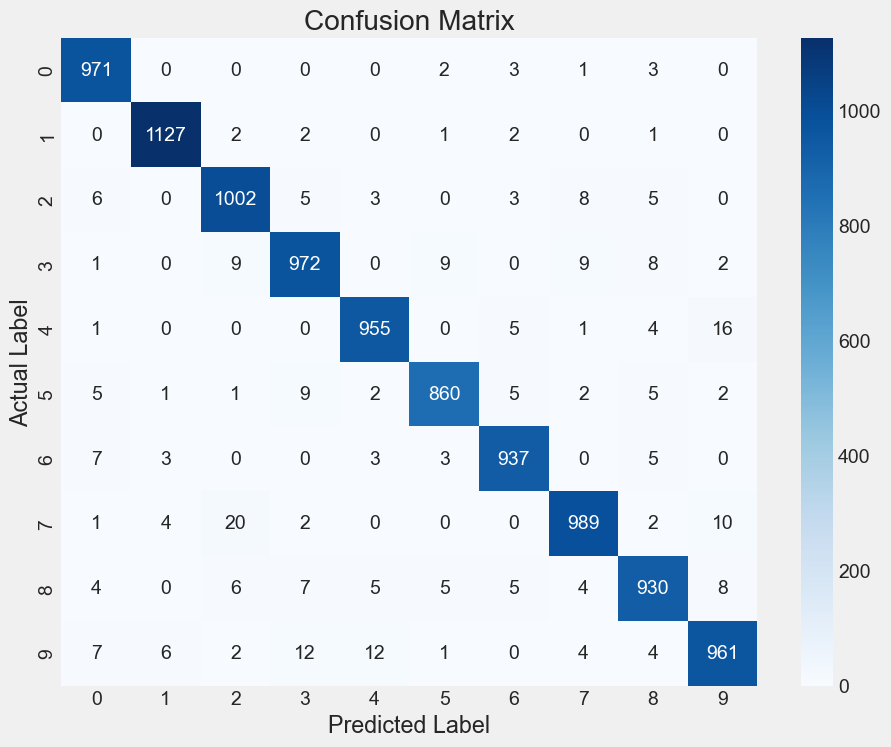

In [25]:
# 2. Confusion Matrix
print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

An accuracy of around 97% is a fantastic result for a non-neural network model on this dataset. It shows the power of ensemble methods.

The confusion matrix heatmap is very telling. The diagonal is bright, showing most predictions were correct. The off-diagonal cells show the errors. For example, you might see the model confusing 4s with 9s, or 3s with 8s, which are common human mistakes as well.

##### Traditional ML on Images: 
This project proves that you don't always need complex deep learning models for high performance on image tasks. A well-tuned Random Forest can serve as a powerful and highly effective baseline.

##### Model Performance:
Achieving ~97% accuracy means the model correctly identified about 9,700 of the 10,000 test images, a remarkable feat. The confusion matrix provides a clear diagnostic tool to understand the model's specific weaknesses.